First 5 rows of the dataset:
   rooms  area         price
0      4   396  1.961325e+06
1      5   595  2.990684e+06
2      3   279  1.382702e+06
3      5   515  2.581658e+06
4      5   600  2.972386e+06

Model results:
Intercept: -48130.16
Coefficient (rooms): 532898.67
Mean Squared Error (MSE): 33637387305.92
R-squared (R2): 0.9549


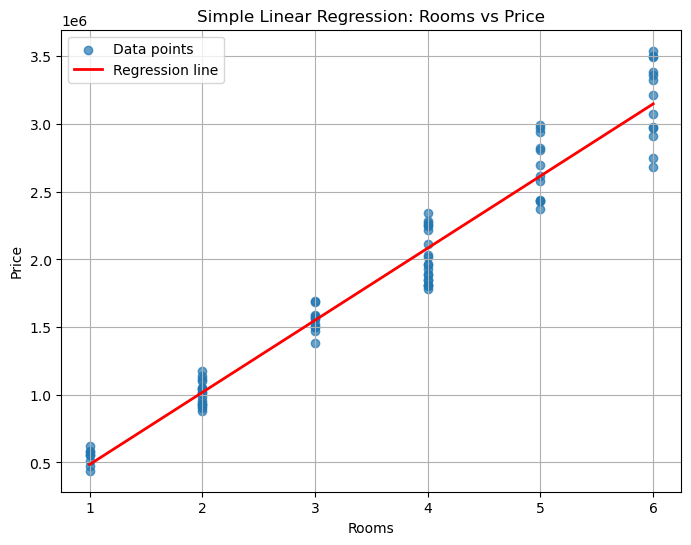

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --------------------------
# Create synthetic dataset
# --------------------------
np.random.seed(42)
rooms = np.random.randint(1, 7, size=80)                    # number of rooms (1 to 6)
area = rooms * np.random.randint(90, 121, size=80)          # approx area = rooms * (90..120)
price = 5000 * area + np.random.normal(0, 20000, size=80)  # house price with noise

df = pd.DataFrame({'rooms': rooms, 'area': area, 'price': price})
print("First 5 rows of the dataset:")
print(df.head())

# --------------------------
# Simple Linear Regression
# Use 'rooms' to predict 'price'
# --------------------------
X = df[['rooms']].values   # predictor (2D)
y = df['price'].values     # target

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("\nModel results:")
print("Intercept:", round(model.intercept_, 2))
print("Coefficient (rooms):", round(model.coef_[0], 2))
print("Mean Squared Error (MSE):", round(mse, 2))
print("R-squared (R2):", round(r2, 4))

# --------------------------
# Plot: scatter + regression line
# --------------------------
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='Data points', alpha=0.7)
# For line, sort X for smooth line drawing
sort_idx = np.argsort(X[:,0])
plt.plot(X[:,0][sort_idx], y_pred[sort_idx], color='red', linewidth=2, label='Regression line')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Rooms vs Price')
plt.legend()
plt.grid(True)
plt.show()